In [1]:
import numpy as np
from math import *
from pylab import *
import matplotlib.pyplot as plt


# 1. Lecture des données

In [2]:
# -*- coding: utf-8 -*-

def read_file ( filename ):
    """
    Lit le fichier contenant les données du geyser Old Faithful
    """
    # lecture de l'en-tête
    infile = open ( filename, "r" )
    for ligne in infile:
        if ligne.find ( "eruptions waiting" ) != -1:
            break

    # ici, on a la liste des temps d'éruption et des délais d'irruptions
    data = []
    for ligne in infile:
        nb_ligne, eruption, waiting = [ float (x) for x in ligne.split () ]
        data.append ( eruption )
        data.append ( waiting )
    infile.close ()

    # transformation de la liste en tableau 2D
    data = np.asarray ( data )
    data.shape = ( int ( data.size / 2 ), 2 )

    return data

data = read_file ( "2015_tme4_faithful.txt" )

data : tableau  à 2 dimensions :

chaque ligne représente la durée d'une éruption ainsi que le délai jusqu'à la prochaine éruption.

la première colonne du tableau contenant les durées.

la deuxième les délais.

# 2. Loi normale bidimensionnelle

In [3]:
def normale_bidim (x , z , tab) :
    
    sigmax = tab[2]
    sigmaz = tab[3]
    ux=tab[0]
    uz = tab[1]
    p= tab[4]
    
    a = 1 / ( 2*math.pi*sigmax*sigmaz*np.sqrt(1-p**2) )
    b = (-1/(2*(1-p**2))) *  ( ((x-ux) /sigmax)**2 - 2*p * ((x-ux)*(z-uz))/(sigmax*sigmaz) +  ((z-uz) /sigmaz)**2)
    c = a*np.exp(b)
    return c

In [4]:
normale_bidim ( 1, 2, [1.0,2.0,3.0,4.0,0] )

0.013262911924324612

In [5]:
normale_bidim ( 1, 0, [1.0,2.0,1.0,2.0,0.7] )

0.041804799427614503

# 3. Visualisation de loi normale bidimensionnelle

In [6]:
def dessine_1_normale ( params ):
    # récupération des paramètres
    mu_x, mu_z, sigma_x, sigma_z, rho = params

    # on détermine les coordonnées des coins de la figure
    x_min = mu_x - 2 * sigma_x
    x_max = mu_x + 2 * sigma_x
    z_min = mu_z - 2 * sigma_z
    z_max = mu_z + 2 * sigma_z

    # création de la grille
    x = np.linspace ( x_min, x_max, 100 )
    z = np.linspace ( z_min, z_max, 100 )
    X, Z = np.meshgrid(x, z)

    # calcul des normales
    norm = X.copy ()
    for i in range ( x.shape[0] ):
        for j in range ( z.shape[0] ):
            norm[i,j] = normale_bidim ( x[i], z[j], params )

    # affichage
    fig = plt.figure ()
    plt.contour ( X, Z, norm, cmap=cm.autumn )
    plt.show ()

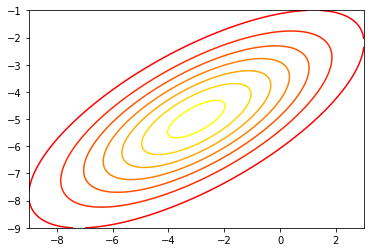

In [7]:
dessine_1_normale ( [-3.0,-5.0,3.0,2.0,0.7 ])

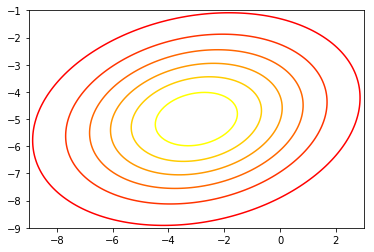

In [8]:
dessine_1_normale ( [-3.0,-5.0,3.0,2.0,0.2 ])

# 4. Visualisation des données du Old Faithful

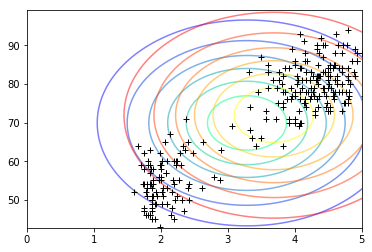

In [9]:
def dessine_normales ( data, params, weights, bounds, ax ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # on détermine les coordonnées des coins de la figure
    x_min = bounds[0]
    x_max = bounds[1]
    z_min = bounds[2]
    z_max = bounds[3]

    # création de la grille
    nb_x = nb_z = 100
    x = np.linspace ( x_min, x_max, nb_x )
    z = np.linspace ( z_min, z_max, nb_z )
    X, Z = np.meshgrid(x, z)

    # calcul des normales
    norm0 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
            norm0[j,i] = normale_bidim ( x[i], z[j], params[0] )# * weights[0]
    norm1 = np.zeros ( (nb_x,nb_z) )
    for j in range ( nb_z ):
        for i in range ( nb_x ):
             norm1[j,i] = normale_bidim ( x[i], z[j], params[1] )# * weights[1]

    # affichages des normales et des points du dataset
    ax.contour ( X, Z, norm0, cmap=cm.winter, alpha = 0.5 )
    ax.contour ( X, Z, norm1, cmap=cm.autumn, alpha = 0.5 )
    for point in data:
        ax.plot ( point[0], point[1], 'k+' )


def find_bounds ( data, params ):
    # récupération des paramètres
    mu_x0, mu_z0, sigma_x0, sigma_z0, rho0 = params[0]
    mu_x1, mu_z1, sigma_x1, sigma_z1, rho1 = params[1]

    # calcul des coins
    x_min = min ( mu_x0 - 2 * sigma_x0, mu_x1 - 2 * sigma_x1, data[:,0].min() )
    x_max = max ( mu_x0 + 2 * sigma_x0, mu_x1 + 2 * sigma_x1, data[:,0].max() )
    z_min = min ( mu_z0 - 2 * sigma_z0, mu_z1 - 2 * sigma_z1, data[:,1].min() )
    z_max = max ( mu_z0 + 2 * sigma_z0, mu_z1 + 2 * sigma_z1, data[:,1].max() )

    return ( x_min, x_max, z_min, z_max )


# affichage des données : calcul des moyennes et variances des 2 colonnes
mean1 = data[:,0].mean ()
mean2 = data[:,1].mean ()
std1  = data[:,0].std ()
std2  = data[:,1].std ()

# les paramètres des 2 normales sont autour de ces moyennes
params = np.array ( [(mean1 - 0.2, mean2 - 1, std1, std2, 0),
                     (mean1 + 0.2, mean2 + 1, std1, std2, 0)] )
weights = np.array ( [0.4, 0.6] )
bounds = find_bounds ( data, params )

# affichage de la figure
fig = plt.figure ()
ax = fig.add_subplot(111)
dessine_normales ( data, params, weights, bounds, ax )
plt.xlim(0.0,5.0)
plt.show ()

# 5. EM : l'étape E 

In [11]:
def Q_i(data,cp,cw):
    """
    (float np.2D-array)x(float np.2D-array)x(float np.array)-> (float np.2D-array)
    data : Est le tableau data, à 2 dimension, des données du old faithful, 
    cp : un tableau current_params à 2 dimensions contenant les 2 quintuplets de paramètres des deux lois normales 
    current_params = np.array ( [(mu_x, mu_z, sigma_x, sigma_z, rho),   # params 1ère loi normale
                                 (mu_x, mu_z, sigma_x, sigma_z, rho)] ) # params 2ème loi 
                                 
    cw : un tableau current_weights contenant les poids (π0,π1) des deux lois normales
    Retourne : un tableau à deux dimensions dont la premiere (respectivement la deuxieme) colonne correspond a la valeur d'estimation  du couple (xi,zi) généré par la premiere loi (respectivement la deuxieme loi)


    """
    
    tmp = cw[0]*(1/ (2*math.pi*cp[0][2]*cp[0][3]*np.sqrt(1-cp[0][4])) )
    a0 =tmp*np.exp( - (1/(2*(1-cp[0][4]**2)) )*(  ((data[0][0] - cp[0][0])/cp[0][2])**2-2*cp[0][4]*((data[0][0]-cp[0][0])*(data[0][1]-cp[0][1]))/(cp[0][2]*cp[0][3])+((data[0][1]-cp[0][1] )/cp[0][3])**2))
        
    tmp = cw[1]*(1/ (2*math.pi*cp[1][2]*cp[1][3]*np.sqrt(1-cp[1][4])) )
    a1 =tmp*np.exp( - (1/(2*(1-cp[1][4]**2)) )*(  ((data[0][0] - cp[1][0])/cp[1][2])**2-2*cp[1][4]*((data[0][0]-cp[1][0])*(data[0][1]-cp[1][1]))/(cp[1][2]*cp[1][3])+((data[0][1]-cp[1][1] )/cp[1][3])**2))
    q = a0 /(a0 + a1) 
    qq = a1 /(a0 + a1) 
    tab = np.array([q,qq])
    
    
    for i in range(1,len(data)):
        tmp=cw[0]*(1/(2*math.pi*cp[0][2]*cp[0][3]*np.sqrt(1-cp[0][4])) )
        a0 =tmp* np.exp(-(1/(2*(1-cp[0][4]**2)))*(((data[i][0]-cp[0][0])/cp[0][2])**2-2*cp[0][4]*( (data[i][0]-cp[0][0])*(data[i][1]-cp[0][1]))/(cp[0][2]*cp[0][3])+((data[i][1]-cp[0][1])/cp[0][3])**2 ))
        
        tmp = cw[1]*(1/ (2*math.pi*cp[1][2]*cp[1][3]*np.sqrt(1-cp[1][4])) )
        a1 =tmp*np.exp(-(1/(2*(1-cp[1][4]**2)))*(((data[i][0] - cp[1][0])/cp[1][2])**2-2*cp[1][4]*((data[i][0]-cp[1][0])*(data[i][1]-cp[1][1]))/(cp[1][2]*cp[1][3])+((data[i][1]-cp[1][1] )/cp[1][3])**2) )
        q = a0 /(a0 + a1) 
        qq = a1 /(a0 + a1)
        v= np.array([q,qq])
        tab = np.vstack((tab,v))
    
    return tab

In [26]:
#teste1
cp = np.array([ [ 3.28778309, 69.89705882, 1.13927121, 13.56996002, 0.], 
                            [3.68778309, 71.89705882, 1.13927121, 13.56996002, 0.] ])
cw = np.array ( [ 0.5, 0.5 ] )

t=Q_i ( data, cp, cw )

In [28]:
#teste2

current_params = np.array([[3.2194684, 67.83748075,1.16527301,13.9245876,0.9070348],
                           [3.75499261, 73.9440348,1.04650191,12.48307362,0.88083712]])
current_weights = np.array([0.49896815,0.50103185])
t=Q_i ( data, current_params, current_weights )

# 6. EM : l'étape M 

In [60]:
def M_step(data, q, cp, cw ):
    """
    (2D-array)*(2D-array)*(float 2D-array)*(float array)->(float 2D-array)*(float array) 
    parametres:
    Data : données lues du fichier 
    q  : tableau renvoyé par la fonction Q_i
    cp : current_params : les quintuplets 
    cw : current_weights : poids courants
    Renvoie un couple (new_params,new_weights) sous forme ([[μx0,μz0,σx0,σz0,ρ0],[μx1,μz1,σx1,σz1,ρ1]])
    """
    
    sumq = np.sum(q,axis = 0) # On somme le tableau par colonne 

    pi0 = sumq[0]/(sumq[0]+sumq[1])# mise a jour de pi0
   
    mu_x0 =(np.sum( data[i][0]*q[i][0] for i in range(len(data)) ) )/ sumq[0] # mise a jour de mu_x0
    mu_z0 =(np.sum( data[i][1]*q[i][0] for i in range(len(data)) ) )/ sumq[0] # mise a jour de mu_z0
   
    sigma_x0 = np.sqrt((np.sum(q[i][0]*(data[i][0]-mu_x0)**2 for i in range(len(data))))/sumq[0])
    sigma_z0 = np.sqrt((np.sum(q[i][0]*(data[i][1]-mu_z0)**2 for i in range(len(data))))/sumq[0])
     
    p0 = np.sum(q[i][0]*(((data[i][0]-mu_x0)*(data[i][1]-mu_z0))/(sigma_x0*sigma_z0)) for i in range(len(data))  )/sumq[0]
    
    pi1 = sumq[1]/(sumq[0]+sumq[1])# mise a jour de pi1
    
    mu_x1 =(np.sum( data[i][0]*q[i][1] for i in range(len(data)) ) )/ sumq[1] # mise a jour de mu_x0
    mu_z1 =(np.sum( data[i][1]*q[i][1] for i in range(len(data)) ) )/ sumq[1] # mise a jour de mu_z0
    
    sigma_x1 = np.sqrt((np.sum(q[i][1]*(data[i][0]-mu_x1)**2 for i in range(len(data))))/sumq[1])
    sigma_z1 = np.sqrt((np.sum(q[i][1]*(data[i][1]-mu_z1)**2 for i in range(len(data))))/sumq[1])
    
    p1 = np.sum(q[i][1]*(((data[i][0]-mu_x1)*(data[i][1]-mu_z1))/(sigma_x1*sigma_z1)) for i in range(len(data)))/sumq[1]
    
    
    return np.array([[mu_x0,mu_z0,sigma_x0,sigma_z0,p0],[mu_x1,mu_z1,sigma_x1,sigma_z1,p1]]), np.array([pi0,pi1])
    
    
    
    

In [59]:
#teste
current_params = array([(2.51460515, 60.12832316, 0.90428702, 11.66108819, 0.86533355),
(4.2893485,79.76680985, 0.52047055,7.04450242,0.58358284)])
current_weights = array([ 0.45165145,0.54834855])
Q = Q_i ( data, current_params, current_weights )

new_params, new_weights = M_step ( data, Q, current_params, current_weights )

# 7. Algorithme EM : mise au point 